In [1]:
import tsne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, normalize

Matplotlib is building the font cache; this may take a moment.


In [2]:
np.random.seed(0)

# a)

colunas: age, year, n_of_axilary, class

In [3]:
# carrega a base de dados
hb = pd.read_csv('haberman.data', header=None)
hb.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# seleciona as 3 primeiras colunas
X = hb[[0, 1, 2]].values
# seleciona as classes
labels = hb[[3]]
# verifica a classe minoritária
np.unique(labels,return_counts=True)
# normaliza os dados
X_norm = normalize(X)

In [5]:
# aplicando o tsne
Y = tsne.tsne(X_norm, 2, 3, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 306...
Mean value of sigma: 0.027388
Iteration 10: error is 12.373230
Iteration 20: error is 10.807585
Iteration 30: error is 10.419484
Iteration 40: error is 10.249793
Iteration 50: error is 10.254351
Iteration 60: error is 10.248175
Iteration 70: error is 10.205973
Iteration 80: error is 10.245000
Iteration 90: error is 10.259191
Iteration 100: error is 10.082518
Iteration 110: error is 0.850664
Iteration 120: error is 0.525345
Iteration 130: error is 0.403188
Iteration 140: error is 0.354605
Iteration 150: error is 0.339899
Iteration 160: error is 0.330919
Iteration 170: error is 0.324813
Iteration 180: error is 0.320235
Iteration 190: error is 0.316902
Iteration 200: error is 0.314509
Iteration 210: error is 0.312751
Iteration 220: error is 0.311437
Iteration 230: error is 0.310458
Iteration 240: error is 0.309666
Iteration 250: error is 0.308967
Iteration 260: error is 0.308388
It

In [6]:
df_Y = pd.DataFrame(Y)
df_Y['class'] = labels

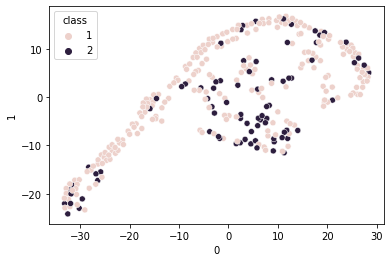

In [7]:
sns.scatterplot(x=0, y=1, hue='class', data=df_Y)
plt.show()

# b)

In [5]:
def nearest_neighbour(X):
    """
    Calcula os 5 pontos mais próximos usando a distância euclidiana
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

In [14]:
def smote(Xamostras):
    """
    Aumenta uma base de dados em 3 vezes
    """
    indices_proximos = nearest_neighbour(Xamostras)    
    matriz = []
    for i in range(3):
        for j in range (len(indices_proximos)):
            x = Xamostras[j]
            alpha = np.random.uniform(size=1)[0]
            ix_prox = np.random.choice(indices_proximos[j], size=1)[0]
            y = Xamostras[ix_prox]
            x_novo = (1 - alpha)*x + alpha*y
            matriz.append(x_novo)
    return np.array(matriz)

In [15]:
# pega os indices das classes minoritárias
indice_amostras = labels[labels[3]==2].index
# seleciona as amostras minoritárias
Xamostras = X_norm[indice_amostras]

In [17]:
novas_amostras = smote(Xamostras)
nova_base = np.concatenate([X_norm, novas_amostras], axis=0)
labels_amostras = np.ones(len(novas_amostras), dtype='int')*2
novas_labels = np.concatenate([labels.values.flatten(), labels_amostras])

In [18]:
# aplicação do tsne na nova base
Y_aumentado = tsne.tsne(nova_base, 2, 3, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 549...
Computing P-values for point 500 of 549...
Mean value of sigma: 0.020547
Iteration 10: error is 14.670935
Iteration 20: error is 12.148110
Iteration 30: error is 10.698966
Iteration 40: error is 9.984736
Iteration 50: error is 9.838194
Iteration 60: error is 9.815012
Iteration 70: error is 9.810698
Iteration 80: error is 9.796674
Iteration 90: error is 9.785963
Iteration 100: error is 9.783512
Iteration 110: error is 0.821640
Iteration 120: error is 0.593057
Iteration 130: error is 0.469871
Iteration 140: error is 0.409745
Iteration 150: error is 0.378367
Iteration 160: error is 0.360185
Iteration 170: error is 0.348912
Iteration 180: error is 0.341810
Iteration 190: error is 0.337102
Iteration 200: error is 0.333520
Iteration 210: error is 0.330815
Iteration 220: error is 0.328895
Iteration 230: error is 0.327381
Iteration 240: error is 0.326083
Iteration 250: error is 0.325007

In [19]:
df_Y_aumentado = pd.DataFrame(Y_aumentado)
df_Y_aumentado['class'] = novas_labels

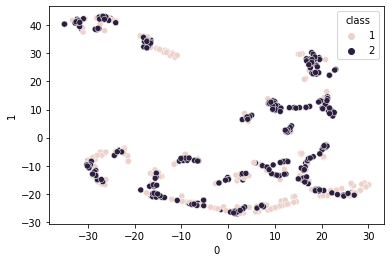

In [20]:
sns.scatterplot(x=0, y=1, hue='class', data=df_Y_aumentado)
plt.show()

# c)

Além da diferença entre o número de amostras, o t-SNE da base desbalanceada informa pouca coisa relevante sobre os dados. Contudo, com o aumento do número de amostras da classe 2 (classe minoritária) o t-SNE mostra que as duas classes presentes nos dados possuem características muito similares, de forma que os pontos gerados pelo t-SNE das duas classes são muito parecidos.